# simple prediction of stock market

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

MinMaxScaler를 함수로 만들어 정의. 본래는 sklearn에서 함수를 import해 사용한다.

In [3]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [4]:
timesteps = seq_length = 7
data_dim = 5
output_dim = 1

In [5]:
xy = np.loadtxt('data-02-stock.csv',delimiter = ',')
xy = xy[::-1] #시간순으로 데이터를 정리하기 위해 reverse 시킴
xy = MinMaxScaler(xy) #normalize
x = xy #전체 데이터 모두
y = xy[:,[-1]] #closed label만 뽑아옴

In [6]:
dataX = []
dataY = []

for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length] #예측하고 싶은 주가의 7일 전부터 현재까지의 가격
    _y = y[i + seq_length] #다음 시장의 종가
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)


[[0.95006411 0.96705259 0.98513152 1.         0.13110042]
 [1.         1.         1.         0.98032714 0.19538838]
 [0.86478287 0.96761505 0.90627718 0.99458843 0.27135904]
 [0.87677198 0.87676219 0.89669791 0.89657542 0.24879438]
 [0.83601645 0.86755087 0.87430287 0.90136169 0.26283561]
 [0.87961848 0.89981959 0.89592112 0.89284393 0.2833367 ]
 [0.81775009 0.87581199 0.86910622 0.90640195 0.27757217]] -> [0.33620438]
[[1.         1.         1.         0.98032714 0.19538838]
 [0.86478287 0.96761505 0.90627718 0.99458843 0.27135904]
 [0.87677198 0.87676219 0.89669791 0.89657542 0.24879438]
 [0.83601645 0.86755087 0.87430287 0.90136169 0.26283561]
 [0.87961848 0.89981959 0.89592112 0.89284393 0.2833367 ]
 [0.81775009 0.87581199 0.86910622 0.90640195 0.27757217]
 [0.93027071 0.98088306 0.90931571 0.88835051 0.33620438]] -> [0.33842496]
[[0.86478287 0.96761505 0.90627718 0.99458843 0.27135904]
 [0.87677198 0.87676219 0.89669791 0.89657542 0.24879438]
 [0.83601645 0.86755087 0.87430287 0.9

In [7]:
#TEST SET과 TRAINING SET 나누기
train_size = int(len(dataY) * 0.7) #training 셋을 전체 데이터의 70%만 사용하겠다
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [8]:
X = tf.placeholder(tf.float32, [None,seq_length,data_dim])
Y = tf.placeholder(tf.float32, [None,1])

In [9]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units = 7, state_is_tuple = True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None) # RNN을 돌린 후 fully connected layer에 넣는다. (정확성 높아짐)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `layer.__call__` method instead.


In [10]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

0 19.038826
1 13.490538
2 11.741561
3 11.907644
4 11.757874
5 10.919161
6 9.750898
7 8.614247
8 7.719817
9 7.1228523
10 6.759268
11 6.5034385
12 6.2310467
13 5.866511
14 5.4025207
15 4.8900666
16 4.4096184
17 4.036198
18 3.8059573
19 3.692067
20 3.6118088
21 3.484981
22 3.3025818
23 3.1348774
24 3.0707018
25 3.134927
26 3.254845
27 3.3257928
28 3.3074121
29 3.2385054
30 3.1788497
31 3.1518664
32 3.1363864
33 3.101476
34 3.039045
35 2.9656954
36 2.904715
37 2.869757
38 2.8599906
39 2.8649366
40 2.8726542
41 2.8758204
42 2.8733313
43 2.86814
44 2.8636584
45 2.8610497
46 2.8586695
47 2.8534777
48 2.843242
49 2.828077
50 2.810471
51 2.7939172
52 2.781081
53 2.7726333
54 2.7673748
55 2.7634134
56 2.7595007
57 2.7556045
58 2.7524285
59 2.750398
60 2.7489913
61 2.7469437
62 2.7431135
63 2.7372782
64 2.730243
65 2.7232482
66 2.7171872
67 2.7122104
68 2.7079117
69 2.7038255
70 2.6998007
71 2.6960042
72 2.6926324
73 2.6896372
74 2.6866937
75 2.6834164
76 2.6796246
77 2.6754417
78 2.6711717
79 2.

<function matplotlib.pyplot.show(*args, **kw)>

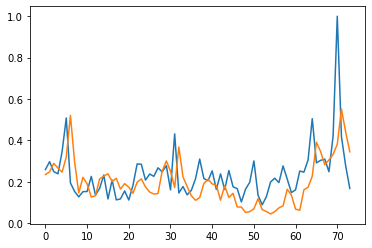

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    _, l = sess.run([train,loss],feed_dict = {X:trainX, Y:trainY})
    print(i,l)
    
testpredict = sess.run(Y_pred,feed_dict = {X:testX})

plt.plot(testY)
plt.plot(testpredict)
plt.show